In [1]:
import networkx as nx
from itertools import combinations, groupby
import random
import matplotlib.pyplot as plt
import pandas as pd
from extended_networkx_tools.Analytics import Analytics

ModuleNotFoundError: No module named 'numba'

In [7]:
def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

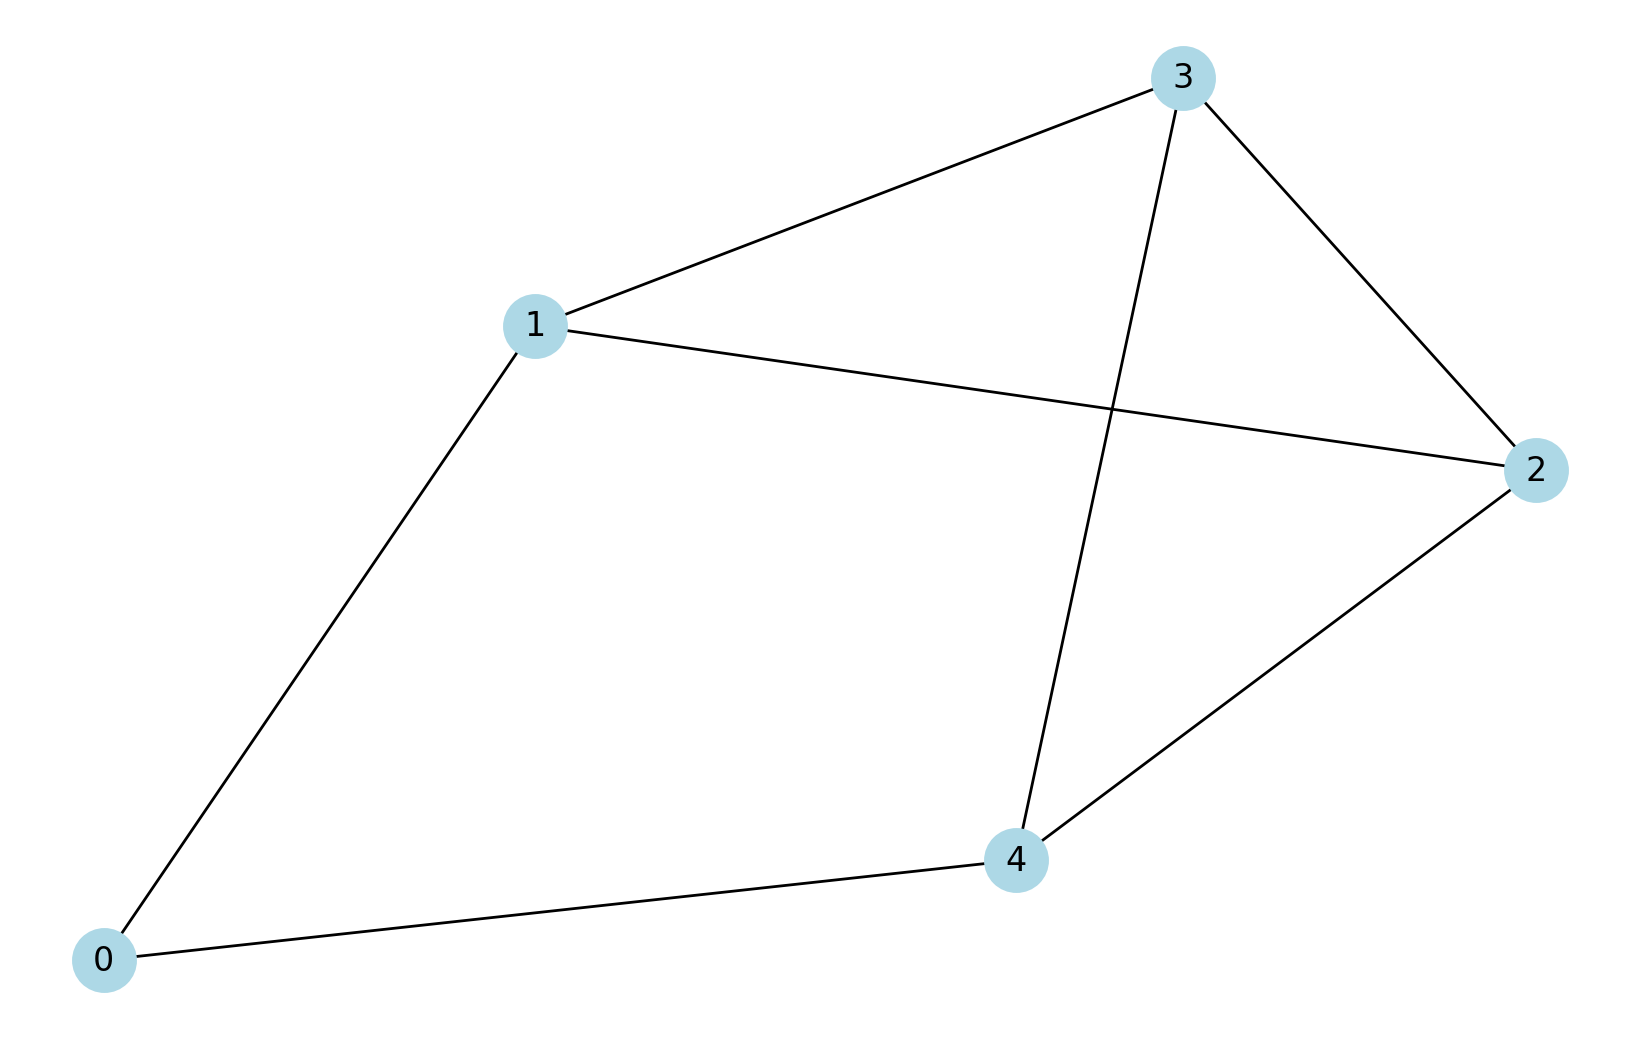

In [8]:
nodes = 5
seed = random.randint(1,10)
probability = 0.1
G = gnp_random_connected_graph(nodes,probability)

plt.figure(figsize=(8,5))
nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)


In [9]:
df = nx.to_pandas_adjacency(G, dtype=int)
df

,0,1,2,3,4
0,0,1,0,0,1
1,1,0,1,1,0
2,0,1,0,1,1
3,0,1,1,0,1
4,1,0,1,1,0


In [10]:
nx.get_stochastic_neighbour_matrix(G, copy=False)

AttributeError: module 'networkx' has no attribute 'get_stochastic_neighbour_matrix'